<a href="https://colab.research.google.com/github/Andrei-Madalin-Vlad/proiect-la/blob/main/Proiect_LA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 0: Configurări inițiale și importarea bibliotecilor


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setăm stilul pentru grafice
sns.set(style="whitegrid")
%matplotlib inline

# Creăm un folder "results" unde vom salva grafice și fișiere text
os.makedirs("results", exist_ok=True)

# STEP 1: Încărcarea datelor




In [2]:
# Presupunem că fișierul se află în "sample_data" sub numele "data.csv"
data_path = "sample_data/data.csv"
df = pd.read_csv(data_path)

print("Setul de date a fost încărcat cu succes. Primele 5 rânduri:")
display(df.head())

# Convertim coloana 'Year' pentru a avea doar anul (numeric)
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Creăm o coloană "Target" bazată pe numărul de nașteri (Births)
# Exemplu: 1 dacă numărul de nașteri este peste mediana, altfel 0
df['Target'] = (df['Births'] > df['Births'].median()).astype(int)

# Verificăm modificarea
print("Setul de date după adăugarea coloanei Target:")
display(df.head())

Setul de date a fost încărcat cu succes. Primele 5 rânduri:


,Year,County_of_Residence,County_of_Residence_FIPS,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
0,2016-01-01,"Clarke County, GA",13059,1392,28.20,38.25,38.35,3211.45,27.33,10.31
1,2016-01-01,"Volusia County, FL",12127,5032,27.91,38.50,38.73,3271.01,26.53,11.35
2,2016-01-01,"Shelby County, AL",1117,2387,29.36,38.50,38.56,3300.62,26.84,10.90
3,2016-01-01,"Leon County, FL",12073,2989,28.49,38.50,38.69,3247.48,26.95,9.28
4,2016-01-01,"Lee County, FL",12071,6750,28.30,38.33,38.49,3253.85,26.96,10.22


Setul de date după adăugarea coloanei Target:


,Year,County_of_Residence,County_of_Residence_FIPS,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks,Target
0,2016,"Clarke County, GA",13059,1392,28.20,38.25,38.35,3211.45,27.33,10.31,0
1,2016,"Volusia County, FL",12127,5032,27.91,38.50,38.73,3271.01,26.53,11.35,1
2,2016,"Shelby County, AL",1117,2387,29.36,38.50,38.56,3300.62,26.84,10.90,0
3,2016,"Leon County, FL",12073,2989,28.49,38.50,38.69,3247.48,26.95,9.28,1
4,2016,"Lee County, FL",12071,6750,28.30,38.33,38.49,3253.85,26.96,10.22,1


# STEP 2: Analiza exploratorie și vizualizarea datelor


# 2.1 Histogramă pentru Ave_Birth_Weight_gms

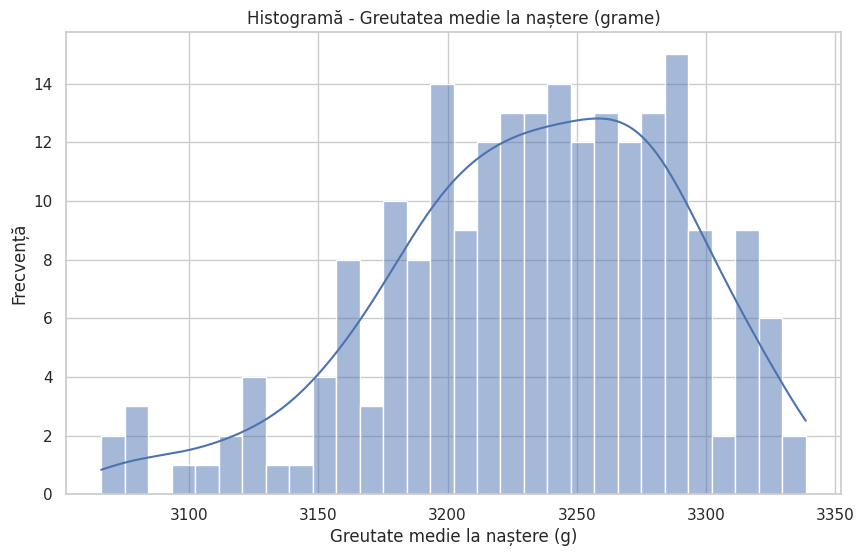

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(df['Ave_Birth_Weight_gms'], bins=30, kde=True)
plt.title("Histogramă - Greutatea medie la naștere (grame)")
plt.xlabel("Greutate medie la naștere (g)")
plt.ylabel("Frecvență")
plt.savefig("results/histogram_ave_birth_weight.png")
plt.show()

# 2.2 Scatter Plot: Ave_Age_of_Mother vs Ave_Birth_Weight_gms

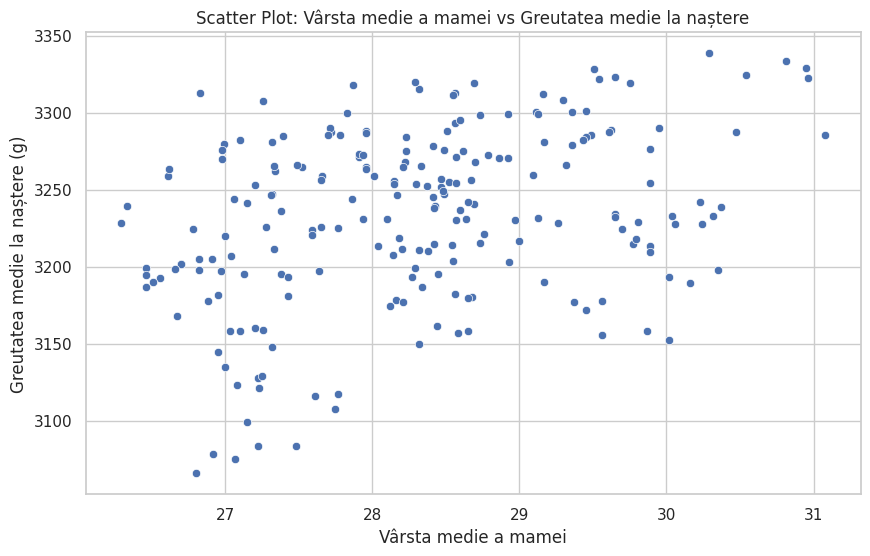

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ave_Age_of_Mother', y='Ave_Birth_Weight_gms', data=df)
plt.title("Scatter Plot: Vârsta medie a mamei vs Greutatea medie la naștere")
plt.xlabel("Vârsta medie a mamei")
plt.ylabel("Greutatea medie la naștere (g)")
plt.savefig("results/scatter_age_vs_birth_weight.png")
plt.show()

# 2.3 Bar Plot: Numărul total de nașteri pe regiuni


Numărul total de nașteri pe regiuni:
State
AL    175853
GA    385457
FL    670194
Name: Births, dtype: int64


<ipython-input-5-612acb6eb7d3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_births.index, y=state_births.values, palette='viridis')


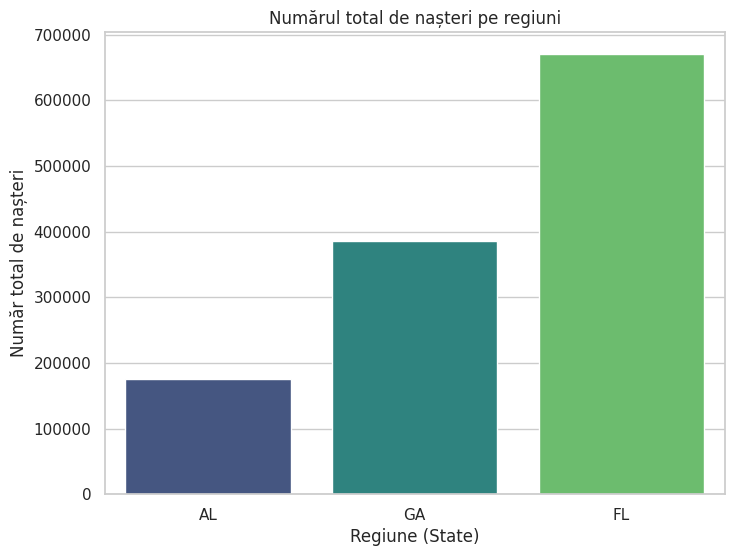

In [5]:
# Extragem statul din coloana 'County_of_Residence'
# Se presupune că formatul este: "Nume County, ST" (ex: "Clarke County, GA")
df['State'] = df['County_of_Residence'].apply(lambda x: x.split(',')[-1].strip())

# Grupăm datele după stat și calculăm suma totală a nașterilor pentru fiecare stat
state_births = df.groupby('State')['Births'].sum().sort_values()

# Afișăm valorile grupate (opțional)
print("Numărul total de nașteri pe regiuni:")
print(state_births)

# Creăm un bar plot pentru vizualizarea numărului total de nașteri pe regiuni
plt.figure(figsize=(8,6))
sns.barplot(x=state_births.index, y=state_births.values, palette='viridis')
plt.title("Numărul total de nașteri pe regiuni")
plt.xlabel("Regiune (State)")
plt.ylabel("Număr total de nașteri")
plt.savefig("results/barplot_births_by_state.png")
plt.show()


# 2.4 Heatmap pentru matricea de corelații



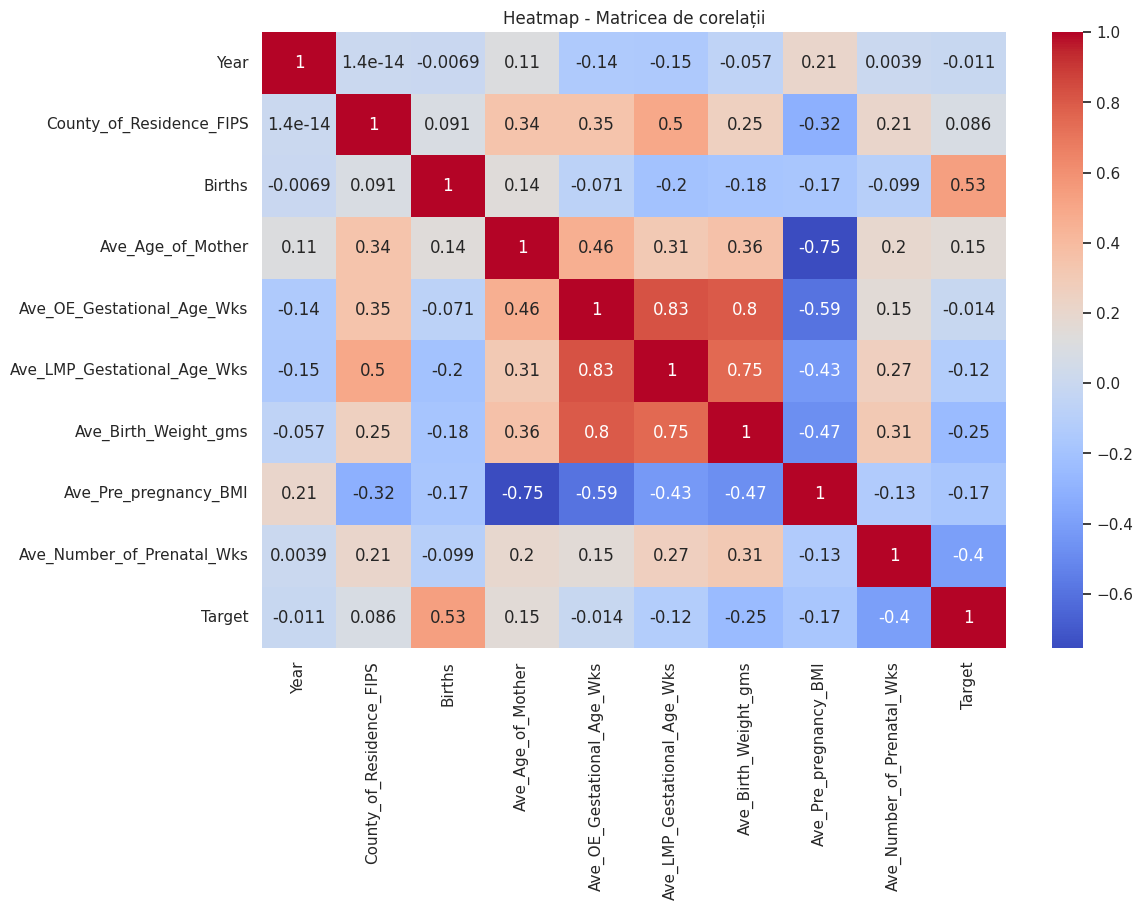

In [6]:
plt.figure(figsize=(12,8))
# Selectăm doar coloanele numerice
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap - Matricea de corelații")
plt.savefig("results/correlation_heatmap.png")
plt.show()

# STEP 3: Pregătirea datelor pentru clasificare

In [7]:
# Definim coloanele care ne interesează pentru antrenare
feature_cols = [
    'Year',
    'County_of_Residence_FIPS',
    'Ave_Age_of_Mother',
    'Ave_OE_Gestational_Age_Wks',
    'Ave_LMP_Gestational_Age_Wks',
    'Ave_Birth_Weight_gms',
    'Ave_Pre_pregnancy_BMI',
    'Ave_Number_of_Prenatal_Wks'
]

target_col = 'Target'

# Creăm un DataFrame care să conțină doar aceste coloane (plus Target)
df_model = df[feature_cols + [target_col]].dropna()

X = df_model[feature_cols]
y = df_model[target_col]

# Împărțim datele în set de antrenament și set de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dimensiunea setului de antrenament:", X_train.shape)
print("Dimensiunea setului de test:", X_test.shape)

Dimensiunea setului de antrenament: (172, 8)
Dimensiunea setului de test: (44, 8)


# STEP 4: Antrenarea și evaluarea a două modele de clasificare




# 4.1 Modelul 1 - Logistic Regression


Rezultate Logistic Regression:
Acuratețe: 0.6363636363636364
Raport de clasificare:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58        21
           1       0.63      0.74      0.68        23

    accuracy                           0.64        44
   macro avg       0.64      0.63      0.63        44
weighted avg       0.64      0.64      0.63        44

Matrice de confuzie:
 [[11 10]
 [ 6 17]]


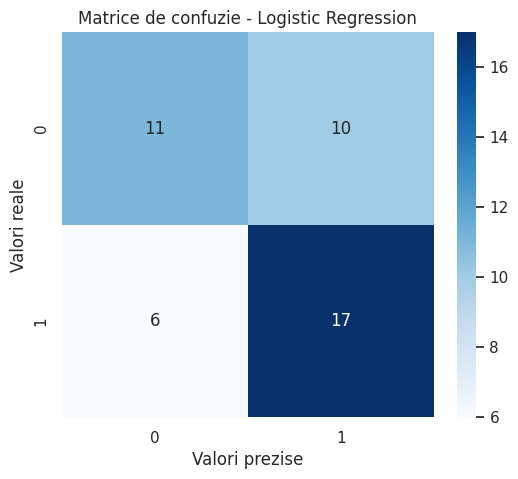

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inițializăm și antrenăm modelul de regresie logistică
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Prezicem valorile pe setul de test
predictions_lr = model_lr.predict(X_test)

# Calculăm metricile
accuracy_lr = accuracy_score(y_test, predictions_lr)
report_lr = classification_report(y_test, predictions_lr)
cm_lr = confusion_matrix(y_test, predictions_lr)

print("Rezultate Logistic Regression:")
print("Acuratețe:", accuracy_lr)
print("Raport de clasificare:\n", report_lr)
print("Matrice de confuzie:\n", cm_lr)

# Plotarea și salvarea matricei de confuzie
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues')
plt.title("Matrice de confuzie - Logistic Regression")
plt.xlabel("Valori prezise")
plt.ylabel("Valori reale")
plt.savefig("results/confusion_matrix_lr.png")
plt.show()

# 4.2 Modelul 2 - Random Forest Classifier




Rezultate Random Forest:
Acuratețe: 0.75
Raport de clasificare:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.73      0.83      0.78        23

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44

Matrice de confuzie:
 [[14  7]
 [ 4 19]]


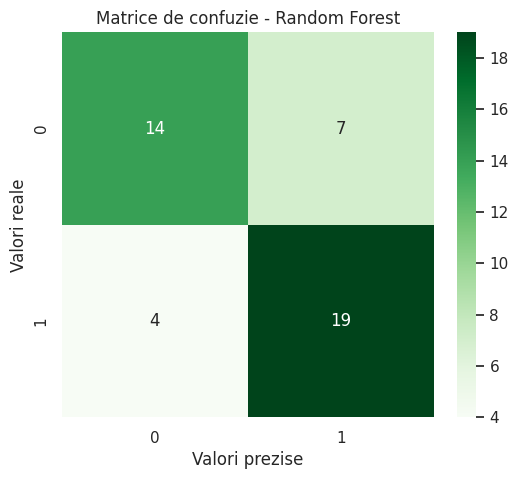

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Inițializăm și antrenăm modelul Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Prezicem valorile pe setul de test
predictions_rf = model_rf.predict(X_test)

# Calculăm metricile
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)
cm_rf = confusion_matrix(y_test, predictions_rf)

print("\nRezultate Random Forest:")
print("Acuratețe:", accuracy_rf)
print("Raport de clasificare:\n", report_rf)
print("Matrice de confuzie:\n", cm_rf)

# Plotarea și salvarea matricei de confuzie
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Greens')
plt.title("Matrice de confuzie - Random Forest")
plt.xlabel("Valori prezise")
plt.ylabel("Valori reale")
plt.savefig("results/confusion_matrix_rf.png")
plt.show()

# STEP 5: Compararea celor două modele




Comparație între Logistic Regression și Random Forest:
Logistic Regression - Acuratețe: 0.6364
Random Forest       - Acuratețe: 0.7500


<ipython-input-10-9ecb8e08b603>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


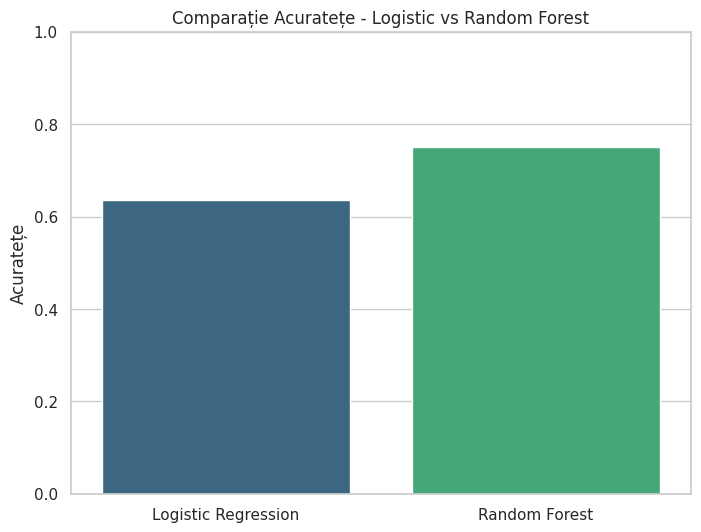

In [10]:
print("\nComparație între Logistic Regression și Random Forest:")
print("=======================================================")
print(f"Logistic Regression - Acuratețe: {accuracy_lr:.4f}")
print(f"Random Forest       - Acuratețe: {accuracy_rf:.4f}")

# Salvăm comparația într-un fișier text
with open("results/model_comparison.txt", "w") as f:
    f.write("Comparație între Logistic Regression și Random Forest:\n")
    f.write("=======================================================\n")
    f.write(f"Logistic Regression - Acuratețe: {accuracy_lr:.4f}\n")
    f.write(f"Random Forest       - Acuratețe: {accuracy_rf:.4f}\n")

# Creăm un mic grafic comparativ pentru acuratețe
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_lr, accuracy_rf]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(0, 1)
plt.title("Comparație Acuratețe - Logistic vs Random Forest")
plt.ylabel("Acuratețe")
plt.savefig("results/model_accuracy_comparison.png")
plt.show()